<a href="https://colab.research.google.com/github/helloKH/python_study/blob/master/Psypy_numpy_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Psypy 4회차 
- numpy & Pandas 실습자료
- 실습교재: Python for data analysis 2nd.
- Chapter 4 ~ 5

In [1]:
!python -V

Python 3.6.9


#### Numpy에서 제공하는 것들
- 효율적인 다차원 배열인 ndarray는 빠른 배열 계산과 유연한 **브로드캐스팅** 기능을 제공
- 반복문을 작성할 필요 없이 전체 데이터배열을 빠르게 계산할 수 있는 표준 수학함수
- 배열데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구
- 선형대수, 난수 생성기, 푸리에 변환 기능
- C, C++, 포드란으로 작성한 코드를 연결할 수 있는 C API

In [0]:
import numpy as np

#### 4.1 ndarray
- N차원의 배열 객체이며, 대규모 데이터 집합을 다룰 수 있는 빠르고 유연한 자료 구조

In [0]:
#### 임의의 값 생성
data = np.random.randn(2,3)
data

array([[-0.07779822,  2.073489  ,  0.76026552],
       [ 0.7516605 ,  1.18407855,  1.114874  ]])

In [0]:
data * 10 # 산술연산

array([[-0.7779822 , 20.73489005,  7.60265521],
       [ 7.51660498, 11.8407855 , 11.14874001]])

In [0]:
data + data

array([[-0.15559644,  4.14697801,  1.52053104],
       [ 1.503321  ,  2.3681571 ,  2.229748  ]])

- ndarray는 같은 종류의 데이터를 담을 수 있는 다차열 배열이다. ndarray의 모든 원소는 같은 자료형이어야 한다
  - shape: 각 차원의 크기를 알려주며, 튜플 형태로 제시
  - dtype: 배열에 저장된 자료형을 알려주는 객체

In [0]:
print(data.shape)

data.dtype

(2, 3)


dtype('float64')

#### 4.1.1 ndarray 생성

In [0]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [0]:
# 같은 길이를 가진 리스트는 다차월 배열 변환 가능
data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [0]:
arr2.ndim

2

In [0]:
arr2.shape

(2, 4)

In [0]:
# np.array의 자료형은 추론되어 dtype에 저장됨
print(arr1.dtype)
print(arr2.dtype)

float64
int64


In [0]:
# 배열에 0 생성
np.zeros(10)
print(np.zeros((2,3,2)))

# 배열에 1 생성
np.ones(4)
np.ones((2,3,1))

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]])

In [0]:
# np.arange는 range의 함수 버전
np.arange(4)

array([0, 1, 2, 3])

#### 4.1.2 ndarray의 dtype

In [0]:
# dtype는 ndarray가 메모리를 해석하기 위해 필요한 정보(메타데이터)를 담고 있음
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

arr1.dtype
arr2.dtype

dtype('int32')

In [0]:
#astype를 통해 배열의 dtype를 다른 형으로 변환
arr = np.array([1,2,3,4,5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
float_arr.dtype

int64


dtype('float64')

In [0]:
#부동소수점은 아래 자리가 버려짐
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
arr.astype(np.int32)

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]


array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [0]:
#숫자 형식의 문자열은 숫자로 변환 가능
numberic_strings = np.array(['1.25', '-9.6', '42'], dtype = np.string_)
numberic_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

#### 4.13 Numpy 배열 산술 연산
- 배열은 for문을 사용하지 않고 데이터를 일괄 처리할 수 있다는 장점이 있음.
- 이를 벡터화라고 하며, 같은 크기의 배열 간 산술 연산은 각 원소 단위로 적용

In [0]:
arr = np.array([[1,2,3], [4,5,6]])
print(arr)
print(arr*arr)
print(arr - arr)

[[1 2 3]
 [4 5 6]]
[[ 1  4  9]
 [16 25 36]]
[[0 0 0]
 [0 0 0]]


In [0]:
# 같은 크기의 배열 간 비교는 불리언, 다른 크기의 배열은 브로드캐스팅 적용
arr2 = np.array([[0, 4, 1], [7, 2, 12]])
arr
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

#### 4.1.4 색인과 슬라이싱 기초

In [0]:
#1차원 배열은 리스트와 유사하게 동작
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [0]:
# numpy 배열은 복사되지 않는다
# 배열조각은 원본의 뷰로, 데이터는 복사되지 않고 뷰에 대한 변경은 원본 배열에 반영
arr_slice = arr[5:8]
print(arr_slice)

arr_slice[1] = 12345
print(arr)

arr_slice[2] = 3
print(arr)

print(arr_slice)

[12 12 12]
[    0     1     2     3     4    12 12345    12     8     9]
[    0     1     2     3     4    12 12345     3     8     9]
[   12 12345     3]


In [0]:
# 뷰 대신 ndarray의 슬라이스의 복사본을 얻고 싶다면 .copy를 사용한다
arr[5:8].copy()

array([   12, 12345,     3])

In [0]:
#단순히 [:]는 배열의 모든 값 할당
arr_slice[:]  =64
arr_slice


array([64, 64, 64])

In [0]:
#2차원 배열(행렬)에서 각 색인에 해당하는 요소는 1차원 배열
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d[2]

#콤마로 구분된 색인 리스트 넘기기
arr2d[2][0]

arr2d[0, 2]

3

In [0]:
#다차원 배열에서 마지막 색인을 생략할 때 반환되는 객체는 상위 차원의 데이터를 포함한 한 차원 낮은 ndarray(텐서 -> 행령, 행렬 -> 배열)
arr3d = ([[[1,2,3], [4,5,6]], [[7,8,9], [9,10,11]]])
arr3d

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [9, 10, 11]]]

In [0]:
arr3d[0] # 2 x 3 배열

[[1, 2, 3], [4, 5, 6]]

- 슬라이스로 선택하기


In [0]:
arr2d[:2] #시작부터 두번째 row까지 선택

array([[1, 2, 3],
       [4, 5, 6]])

In [0]:
arr2d[:2, 1:]


array([[2, 3],
       [5, 6]])

#### 4.1.5 불리언 값으로 선택

In [0]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [0]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [0]:
data

array([[-1.33458251, -1.24979595, -0.71761731, -0.40723833],
       [-0.262714  ,  0.16087214,  0.02004901, -0.82991284],
       [ 0.66481812,  1.03982497,  1.4359695 ,  0.46394048],
       [ 0.45167434,  0.57170577, -0.15811904,  0.18970495],
       [-1.54157059, -1.62261609,  0.75956965,  0.80204636],
       [-0.66846822,  0.57686788,  0.1028832 ,  0.7088873 ],
       [ 0.27471918, -0.01106891, -0.00583349, -0.27276468]])

- 불리언 배열을 배열의 색인으로 사용

In [0]:
data[names == 'Bob']

array([[-1.33458251, -1.24979595, -0.71761731, -0.40723833],
       [ 0.45167434,  0.57170577, -0.15811904,  0.18970495]])

In [0]:
data[names == 'Bob', 2:]

array([[-0.71761731, -0.40723833],
       [-0.15811904,  0.18970495]])

In [0]:
data[names == 'Bob', 3]

array([-0.40723833,  0.18970495])

- Bob이 아닌 요소는 != 혹은 ~을 사용한 조건절 부인

In [0]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [0]:
data[~(names == 'Bob')]

array([[-0.262714  ,  0.16087214,  0.02004901, -0.82991284],
       [ 0.66481812,  1.03982497,  1.4359695 ,  0.46394048],
       [-1.54157059, -1.62261609,  0.75956965,  0.80204636],
       [-0.66846822,  0.57686788,  0.1028832 ,  0.7088873 ],
       [ 0.27471918, -0.01106891, -0.00583349, -0.27276468]])

In [0]:
cond = names == 'Bob'
data[~cond]

array([[-0.262714  ,  0.16087214,  0.02004901, -0.82991284],
       [ 0.66481812,  1.03982497,  1.4359695 ,  0.46394048],
       [-1.54157059, -1.62261609,  0.75956965,  0.80204636],
       [-0.66846822,  0.57686788,  0.1028832 ,  0.7088873 ],
       [ 0.27471918, -0.01106891, -0.00583349, -0.27276468]])

- 논리연산자 통해 &(and) 나 |(or) 로 여러 불리언 사용 가능

In [0]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [0]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.16087214, 0.02004901, 0.        ],
       [0.66481812, 1.03982497, 1.4359695 , 0.46394048],
       [0.45167434, 0.57170577, 0.        , 0.18970495],
       [0.        , 0.        , 0.75956965, 0.80204636],
       [0.        , 0.57686788, 0.1028832 , 0.7088873 ],
       [0.27471918, 0.        , 0.        , 0.        ]])

In [0]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.16087214, 0.02004901, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.57686788, 0.1028832 , 0.7088873 ],
       [0.27471918, 0.        , 0.        , 0.        ]])

#### 4.1.7 배열 전치와 축 바꾸기
- 배열 전치는 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰를 반환
- transponse 메서드

In [0]:
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [0]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [0]:
#다차원배열은 transponse는 튜플로 축 번호를 받아서 치환(첫 번째, 두 번째 축 순서가 바뀌고 마지막은 그대로임)
arr = np.arange(16).reshape(2,2,4)
print(arr)

arr.transpose((1,0,2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

#### 4.2 유니버설 함수
- 교재 참고

#### 4.3 배열지향 프로그래밍
- 반복문 없이 간결한 배열 연산으로 데이터 처리하기

In [0]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [0]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

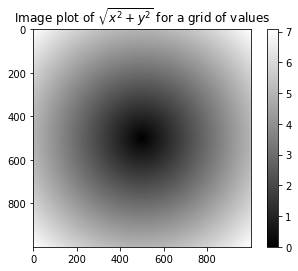

In [0]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap = plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

#### 4.3.1 배열연산으로 조건절 표현하기
- numpy.where는 x if 조건 else y 같은 삼항식의 벡터화 버전

In [0]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [0]:
# cond 값이 True면 x 값을, 아니면 yarr 값을 취하는 함수
# 순수 파이썬으로 큰 배열처리에 늦으며, 다차원배열에서는 사용 불가
result = [(x if c else y)
            for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [0]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

#### 4.3.2 수학 메서드와 통계 메서드

In [0]:
arr = np.random.randn(5, 4)
arr

array([[-0.23088164,  1.52288715,  0.57581038,  1.22661371],
       [-1.02900806,  2.65270894, -0.43508111,  1.79263192],
       [ 1.99371145, -1.22463122, -1.37863835,  0.81079654],
       [ 0.86274755,  1.65621318,  1.143618  , -1.29572009],
       [-0.18419033, -0.12418024,  1.9967183 , -1.89314824]])

In [0]:
arr.mean()

0.42194889209257713

In [0]:
np.mean(arr)

0.42194889209257713

In [0]:
arr.sum()

8.438977841851543

In [0]:
arr.mean(axis = 1) # 선택적으로 axis 인자를 받아서, 해당 axis에 대한 통계 계산 후 한 차수 낮은 배열 반환

array([ 0.7736074 ,  0.74531292,  0.05030961,  0.59171466, -0.05120013])

In [0]:
arr.sum(axis = 0) #0은 기본 값

array([1.41237898, 4.48299781, 1.90242722, 0.64117383])

#### 4.3.3 불리언 배열을 위한 메서드
- 불리언 값을 1(True) or 0(False)로 강제할 수 있다.

In [0]:
arr = np.random.randn(100)
(arr > 0).sum()

49

#### 4.3.4 정렬
- 파이썬의 내장 Numpy 배열 또한 sort 메서드로 정렬 가능

In [0]:
arr = np.random.randn(6)
arr
arr.sort
arr

array([ 0.54537908,  0.41352575, -1.61617998, -1.16904119, -1.03205518,
       -0.37103957])

In [0]:
#다차원 배열 정렬은 메서드에 넘긴 축 값에 따라 1차원 부분 정렬
arr = np.random.randn(5, 3)
arr

array([[-0.43847353, -0.49066603,  1.95616568],
       [ 0.02848393, -0.35168336,  1.09062286],
       [ 0.70569554,  1.52629412,  0.29347064],
       [-2.56302356,  0.33802319,  0.89052188],
       [-0.34237802, -0.28026182, -0.5419606 ]])

In [0]:
arr.sort(1)
arr

array([[-0.49066603, -0.43847353,  1.95616568],
       [-0.35168336,  0.02848393,  1.09062286],
       [ 0.29347064,  0.70569554,  1.52629412],
       [-2.56302356,  0.33802319,  0.89052188],
       [-0.5419606 , -0.34237802, -0.28026182]])

#### 4.3.5 집합 관련 함수

In [0]:
 names = np.array(['Bob', 'Joe', 'Will', "Bob", 'Will'])
 np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [0]:
ints = np.array([2,2,2,1,1,1,3,3,3,1,2,34,2,1,3])
np.unique(ints)

array([ 1,  2,  3, 34])

#### 4.4 배열 데이터의 파일 입출력
- pandas 참고

#### 4.5 선형대수
- 행렬 곱셈은 dot 사용

In [0]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [0]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [0]:
#2차원 배열과 곱셈이 가능한 크기의 1차원 배열 간 행렬 곱셈은 1차원 배열
np.dot(x, np.ones(3))

array([ 6., 15.])

In [0]:
x @ np.ones(3)

array([ 6., 15.])

#### 4.6 난수 생성
- numpy.random 모듈은 파이썬 내장 random 함수를 보강하여 사용

In [0]:
samples = np.random.normal(size = (4,4))
samples

array([[ 1.09555781, -0.58101044, -0.29516115,  0.0848618 ],
       [ 0.09668052,  0.50960468, -2.7151563 , -0.17476002],
       [-0.13172763,  1.26729504,  0.26743371,  0.64642831],
       [ 0.45067095, -1.24764335,  0.07835529, -1.23617017]])

In [0]:
from random import normalvariate
n = 100000
%timeit samples = [normalvariate(0, 1) for _ in range(n)]

10 loops, best of 3: 65.3 ms per loop


### 계단오르내리기 예제

#### 순수 파이썬 코드

In [0]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
  step = 1 if random.randint(0, 1) else -1
  position += step
  walk.append(position)

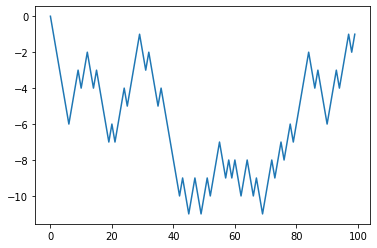

In [0]:
plt.plot(walk[:100])

In [0]:
#walk는 계단을 오르거나 내려간 값의 누적합. 배열식으로 표현 가능
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [0]:
walk.min()

-35

In [0]:
walk.max()

3

In [0]:
# 처음 위치에서 최초로 10칸 떨어지기까지 걸린 시간
(np.abs(walk) >= 10).argmax()

29

#### 4.7.1 한 번에 시뮬레이션하기

In [0]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size = (nwalks, nsteps)) # 0 또는 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print(walks)
print(walks.max())
walks.min()

[[ -1  -2  -1 ...   2   3   4]
 [  1   2   1 ...  20  21  20]
 [ -1   0   1 ... -64 -65 -66]
 ...
 [ -1   0  -1 ... -18 -17 -16]
 [ -1   0   1 ...  64  63  64]
 [ -1  -2  -3 ... -12 -13 -12]]
117


-123

In [0]:
# 누적합이 30 or -30
hits30 = (np.abs(walks) >= 30).any(1)
hits30
print(hits30)
hits30.sum()

[False False  True ...  True  True False]


3404

In [0]:
#처음 30칸 이상 멀어지는 최초 횟수
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

505.50352526439485

In [0]:
#다른 분포, 정규분포에서 시도
steps = np.random.normal(loc = 0, scale = 0.25, size = (nwalks, nsteps))
steps

array([[-0.36996582,  0.16766606,  0.05148032, ...,  0.14090459,
        -0.31340761,  0.0416692 ],
       [-0.32829036, -0.05318888,  0.13444427, ...,  0.00945066,
         0.15890291, -0.62183069],
       [-0.18212059,  0.19976893, -0.29686151, ...,  0.18011506,
        -0.37822633, -0.07213581],
       ...,
       [ 0.19796567,  0.05246895, -0.03860184, ..., -0.04750918,
        -0.27473324,  0.13750264],
       [ 0.17912858, -0.22564549, -0.13432945, ..., -0.14586569,
        -0.28962401, -0.0271029 ],
       [ 0.12135698,  0.30954091, -0.26915961, ...,  0.41301396,
        -0.23742548, -0.0664478 ]])

### PANDAS

In [0]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#### 5.1.1 Series
- 일련의 객체를 담을 수 있는 1차원 배열 같은 자료 구조
- 색인(index)이라는 배열의 데이터와 연관된 이름을 가짐

In [0]:
obj = pd.Series([4, 7, -5, 3]) # index, value 구조
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [0]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [3]:
obj2 = pd.Series([4, 7, -5, 3], index = ['d', 'b', 'a', 'c']) # 각 데이터를 지칭하는 색인 형성
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [0]:
# 단일 값 선택이나 여러 값 선택할 때 색인으로 라벨 가능
obj2['a']
obj2['d'] = 6
obj2[['c', 'a', 'd']] # 'c', 'a', 'd'는 색인의 배열로 해석

c    3
a   -5
d    6
dtype: int64

In [0]:
# Numpy 배열 사용에도 색인 값 유지
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [0]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [0]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

- Series는 고정된 길이의 사전형으로 이해할 수 있음

In [4]:
'b' in obj2
'e' in obj2

False

In [6]:
# 파이썬 사전 객체로부터 Series 객체 생성 가능
sdata = {'Ohio': 35000, 'Texas':71000, 'Oregon': 16000, 'Utan': 50000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utan      50000
dtype: int64

In [18]:
#값이 없을 경우 NaN으로 표시
states = ['Texas', 'California', 'Ohio', 'Oregon']
obj4 = pd.Series(sdata, index = states)
obj4

Texas         71000.0
California        NaN
Ohio          35000.0
Oregon        16000.0
dtype: float64

In [19]:
# 누락된 데이터는 isnull, notnull 사용
pd.isnull(obj4) # 누락된 데이터 지칭

Texas         False
California     True
Ohio          False
Oregon        False
dtype: bool

In [20]:
pd.notnull(obj4)

Texas          True
California    False
Ohio           True
Oregon         True
dtype: bool

In [21]:
obj4.isnull

<bound method Series.isnull of Texas         71000.0
California        NaN
Ohio          35000.0
Oregon        16000.0
dtype: float64>

In [22]:
#Series는 산술 연산에서 색인과 라벨로 자동 정렬
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utan      50000
dtype: int64

In [23]:
obj4

Texas         71000.0
California        NaN
Ohio          35000.0
Oregon        16000.0
dtype: float64

In [24]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utan               NaN
dtype: float64

#### 5.1.2 DataFrame
- Series가 1차원이라면, DataFrame은 2차원으로 확대된 버전
- Excel spreadsheet라고 생각하면 이해하기 쉬움
- 2차원이기 때문에 인덱스가 row, column으로 구성
    - row 는 각 개별데이터를, column은 개별 속성을 의미
- Data analysis, Machine learning data 변형을 위해 가장 많이 사용

In [0]:
data = 'https://raw.githubusercontent.com/helloKH/python_study/master/train.csv'

In [0]:
data
train_data = pd.read_csv(data)

#### head, tail 함수


In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.tail(n = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### dataframe 데이터 파악하기
- shape 속성(row, column)
- describe 함수 - 숫자형 데이터의 통계치 계산
- info함수 - 데이터타입, 각 아이템 개수 등 출력

In [9]:
train_data.shape # raw, column

(891, 12)

- 기초통계량 파악

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 인덱스
- index 속성
- 각 아이템을 특정할 수 있는 고유값 저장(중복 존재할 수 없음)
- 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능

In [12]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

#### 컬럼(column)
- column 속성
- 각각의 특성(feature)을 나타냄
- 복잡한 데이터의 경우, 멀티 칼럼으로 표현 가능

In [13]:
train_data.columns #대개 문자열

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Dataframe 생성하기
- 일반적으로 분석을 위한 데이터는 다른 데이터소스(database, 외부파일)를 통해 dataframe 생성
- 여기서는 실습을 통해 dummy 데이터를 생성하는 방법을 다룰 예정

In [14]:
data = {'a': 100, 'b': 200, 'c': 300}
pd.DataFrame(data, index = ['x', 'y', 'z'])

,a,b,c
x,100,200,300
y,100,200,300
z,100,200,300


In [15]:
data = {'a': [1,2,3], 'b': [4,5,6], 'c': [10,11,12]}
pd.DataFrame(data, index = [0,1,2])

,a,b,c
0,1,4,10
1,2,5,11
2,3,6,12


#### Series로부터 생성하기
- 각 Series의 인덱스 -> column

In [16]:
a = pd.Series([100, 200, 300], ['a', 'b', 'c'])
b = pd.Series([100, 201, 301], ['a', 'b', 'c'])
c = pd.Series([100, 210, 310], ['a', 'b', 'k'])

pd.DataFrame([a,b,c], index = [100,101,102])

,a,b,c,k
100,100.0,200.0,300.0,NaN
101,100.0,201.0,301.0,NaN
102,100.0,210.0,NaN,310.0


#### csv 데이터로부터 DataFrame 생성
- 데이터분석을 위해 dataframe을 생성하는 가장 일반적인 방법
- 데이터 소스로부터 추출된 csv(comma separted values) 파일로부터 생성
- pandas.read_csv 함수 사용

In [17]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### read_csv 함수 파라미터
- sep: 각 데이터 값을 구별하기 위한 구분자(separator) 설정
- header: header를 무시할 경우, None 설정
- index_col: index로 사용할 column 설정
- usecols: 실제로 dataframe에 로딩할 columns만 설정

In [18]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
train_data1 = pd.read_csv('https://raw.githubusercontent.com/helloKH/python_study/master/train.csv', usecols=['PassengerId', 'Survived'])
train_data1.head(3)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1


#### column 선택하기
- 기본적으로 []는 column을 추출
- column index의 경우 인덱스의 리스트 기능 사용 가능
    - 리스트를 전달할 경우 결과는 dataframe
    - 하나의 컬럼명을 전달할 경우 결과는 Series

In [23]:
train_data['Survived'].head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [24]:
train_data[['Survived', 'Age', 'Name']].head(3)

,Survived,Age,Name
0,0,22.0,"Braund, Mr. Owen Harris"
1,1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,26.0,"Heikkinen, Miss. Laina"


In [25]:
#train_data[0] # 0번째 컬럼을 가져오라
train_data[7:10] # 슬라이싱만 예외

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### row 선택하기
- Series의 경우 []로 row 선택이 가능하나, **DataFrame의 경우에는 기본적으로 column을 선택하도록 설계**
- .loc, .iloc로 row 선택가능
    - loc : 인덱스 자체를 사용
    - iloc : 0 based index로 사용
    - 이 두 함수는 ,를 사용하여 column 선택도 가능

In [26]:
train_data.index = np.arange(100, 991)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train_data.loc[986] #986번째 index가 Series 형태로 등장

PassengerId                      887
Survived                           0
Pclass                             2
Name           Montvila, Rev. Juozas
Sex                             male
Age                               27
SibSp                              0
Parch                              0
Ticket                        211536
Fare                              13
Cabin                            NaN
Embarked                           S
Name: 986, dtype: object

In [28]:
train_data.loc[[986, 100, 120, 132]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
120,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.00,NaN,S
132,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.75,NaN,Q


In [29]:
train_data.iloc[0] 

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 100, dtype: object

In [30]:
train_data.loc[[0, 100]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S


#### row, column 동시에 선택하기
- loc, iloc 속성을 이용할 때, 콤마를 이용하여 둘 다 명시 가능

In [31]:
train_data.loc[[986, 100, 120, 132], ['Survived', 'Name', 'Sex', 'Age']]

,Survived,Name,Sex,Age
986,0,"Montvila, Rev. Juozas",male,27.0
100,0,"Braund, Mr. Owen Harris",male,22.0
120,0,"Fynney, Mr. Joseph J",male,35.0
132,1,"Glynn, Miss. Mary Agatha",female,NaN


In [32]:
train_data.iloc[[101, 102], [1,4,5]]

,Survived,Sex,Age
201,0,male,NaN
202,0,male,21.0


#### boolean selection으로 row 선택하기
- numpy에서와 동일한 방식으로 해당 조건에 맞는 row만 선택

In [33]:
class_ = train_data['Pclass'] == 1
age_ = (train_data['Age'] >= 30) & (train_data['Age'] < 40) 

train_data[class_ & age_].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
161,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
237,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
315,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C


#### 새 column 추가하기
- [] 사용하여 추가하기
- insert 함수 사용하여 원하는 위치에 추가하기

In [34]:
train_data['Age_double'] = train_data['Age']* 2
train_data['Age_tripple'] = train_data['Age_double'] + train_data['Age']
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0


In [35]:
train_data.insert(3, 'Fare10', train_data['Fare'] / 10)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


#### column 삭제하기
- drop 함수 사용하여 삭제
- 리스트를 사용하여 멀티플 삭제 가능

In [36]:
train_data.drop('Age_tripple', axis = 1) #복사본, 즉 연산결과 반환
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [37]:
train_data.drop(['Age_double', 'Age_tripple'], axis = 1) #복사본, 즉 연산결과 반환
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [38]:
train_data.drop(['Age_double', 'Age_tripple'], axis = 1, inplace = True) #원본에 연산 수행
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 상관계수 분석

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 변수(column) 사이의 상관계수(correlation)
- cor함수를 통해 상관계수 연산(-1, 1 사이의 결과)
- 연속형(숫자형) 데이터에 대해서만 연산
- 인과관계를 의미하지 않음

In [40]:
train_data.corr()

,PassengerId,Survived,Pclass,Fare10,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.012658,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.257307,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.549500,-0.369226,0.083081,0.018443,-0.549500
Fare10,0.012658,0.257307,-0.549500,1.000000,0.096067,0.159651,0.216225,1.000000
Age,0.036847,-0.077221,-0.369226,0.096067,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.159651,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.216225,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,1.000000,0.096067,0.159651,0.216225,1.000000


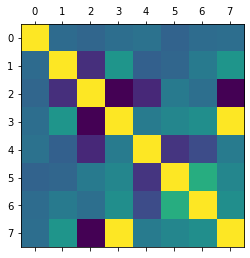

In [41]:
plt.matshow(train_data.corr())

#### NaN 값 확인
- info 함수를 통해 개수 확인
- isna 함수를 통해 boolean 타입으로 확인

In [42]:
train_data.isna().head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,False,False,False,False,False,False,False,False,False,False,False,True,False
101,False,False,False,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False,False,True,False
103,False,False,False,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,False,True,False


In [43]:
train_data['Age'].isna().head()

100    False
101    False
102    False
103    False
104    False
Name: Age, dtype: bool

#### NaN 처리방법
- 데이터에서 삭제
    - dropna 함수
- 다른 값으로 치환
    - fillna 함수 

In [44]:
train_data.dropna().head() # raw 기반 #1개라도 있으면 모두 drop

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
106,7,0,1,5.18625,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
110,11,1,3,1.67000,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
111,12,1,1,2.65500,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [45]:
train_data.dropna(subset = ['Age', 'Cabin']).head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
106,7,0,1,5.18625,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
110,11,1,3,1.67000,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
111,12,1,1,2.65500,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [46]:
train_data.dropna(axis = 1).head() #column level로 적용

,PassengerId,Survived,Pclass,Fare10,Name,Sex,SibSp,Parch,Ticket,Fare
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,0,0,373450,8.0500


- NaN 값 대체하기
    - 평균으로 대체하기
    - 생존자/사망자별 평균으로 대체하기

In [47]:
train_data['Age'].fillna(train_data['Age'].mean())
train_data.tail(5)

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,1.300,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
987,888,1,1,3.000,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
988,889,0,3,2.345,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
989,890,1,1,3.000,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
990,891,0,3,0.775,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [48]:
#생존자 나이 평균
mean1 = train_data[train_data['Survived'] == 1]['Age'].mean()

#사망자 평균
mean2 = train_data[train_data['Survived'] == 0]['Age'].mean()

print(mean1, mean2)

28.343689655172415 30.62617924528302


In [49]:
train_data[train_data['Survived'] == 1]['Age'].fillna(mean1).head()
train_data[train_data['Survived'] == 0]['Age'].fillna(mean2).head()

100    22.000000
104    35.000000
105    30.626179
106    54.000000
107     2.000000
Name: Age, dtype: float64

In [50]:
#실제 데이터에 대입
train_data.loc[train_data['Survived'] == 1]['Age'].fillna(mean1).head()
train_data.loc[train_data['Survived'] == 0]['Age'].fillna(mean2).head()

100    22.000000
104    35.000000
105    30.626179
106    54.000000
107     2.000000
Name: Age, dtype: float64

#### 숫자 데이터와 범주형 데이터의 이해
- 숫자형(Numberical Type) 데이터
- 연속성을 띄는 숫자로 이루어진 데이터
    - 예) Age, Fare 등
- 변수치환

In [51]:
train_data['Pclass'] = train_data['Pclass'].astype(str)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Age 변수 변환하기
- pandas에서는 되도록 for문 등을 이용하지 말 것
- 변환 로직을 함수로 만든 후, apply 함수로 적용

In [0]:
import math

In [0]:
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age / 10) * 10

In [54]:
train_data.head(5)

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train_data['Age'].apply(age_categorize).head()

100    20
101    30
102    20
103    30
104    30
Name: Age, dtype: int64

#### 범주형(Categorical Type) 데이터
- 연속적이지 않은 값(대부분의 경우 숫자를 제외한 나머지 값)을 갖는 데이터를 의미
    - 예) Name, Sex, Ticket, Cabin, Embarked
- 이럴경우, 숫자형 타입이라 할지라도 개념적으로 범주형으로 처리해야 할 경우가 있음
    - 예) Pclass

#### 범주형 데이터 전처리(one-hot encoding)

#### One-hot encoding
- 범주형 데이터는 분석단계에서 계산이 어렵기 때문에 숫자형으로 변경이 필요함
- 범주형 데이터의 각 범주(category)를 column레벨로 변경
- 해당 범주에 해당하면 1, 아니면 0으로 채우는 인코딩 기법
- pandas.get_dummies 함수 사용
    - drop_first: 첫번쨰 카테고리 값은 사용하지 않음

In [57]:
pd.get_dummies(train_data).head() #전체 범주가 column으로 올라감

,PassengerId,Survived,Fare10,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")",...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
100,1,0,0.72500,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
101,2,1,7.12833,38.0,1,0,71.2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
102,3,1,0.79250,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
103,4,1,5.31000,35.0,1,0,53.1000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
104,5,0,0.80500,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked']).head()

,PassengerId,Survived,Fare10,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
100,1,0,0.72500,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
101,2,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
102,3,1,0.79250,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
103,4,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
104,5,0,0.80500,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1


In [59]:
pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first = True).head()

,PassengerId,Survived,Fare10,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
100,1,0,0.72500,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
101,2,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
102,3,1,0.79250,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
103,4,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
104,5,0,0.80500,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1


#### group by
- 아래의 세 단계를 적용하여 데이터를 그룹화(grouping)(SQL의 group by와 개념적으로는 동일, 사용법은 유사)
    - 데이터 분할
    - operation 적용
    - 데이터 병합

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/helloKH/python_study/master/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### GroupBy group 속성
- 각 그룹과 그룹에 속한 index를 dict 형태로 표현

In [61]:
class_group = df.groupby('Pclass')
class_group

In [62]:
class_group.groups

{1: Int64Index([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,
             ...
             853, 856, 857, 862, 867, 871, 872, 879, 887, 889],
            dtype='int64', length=216),
 2: Int64Index([  9,  15,  17,  20,  21,  33,  41,  43,  53,  56,
             ...
             848, 854, 861, 864, 865, 866, 874, 880, 883, 886],
            dtype='int64', length=184),
 3: Int64Index([  0,   2,   4,   5,   7,   8,  10,  12,  13,  14,
             ...
             875, 876, 877, 878, 881, 882, 884, 885, 888, 890],
            dtype='int64', length=491)}

In [63]:
gender_group = df.groupby('Sex')
gender_group.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

#### Grouping 함수
- 그룹 데이터에 적용 가능한 통계함수(NaN은 제외하여 연산)
- count - 데이터 개수
- sum - 데이터 합
- mean, sd, var - 평균, 표준편차, 분산
- min, max - 최소, 최대값

In [64]:
class_group.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [65]:
class_group.sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [66]:
class_group.mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [67]:
class_group.mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [68]:
class_group.min()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Pclass,,,,,,,,,
1,2,0,"Allen, Miss. Elisabeth Walton",female,0.92,0,0,110152,0.0
2,10,0,"Abelson, Mr. Samuel",female,0.67,0,0,11668,0.0
3,1,0,"Abbing, Mr. Anthony",female,0.42,0,0,12460,0.0


In [69]:
class_group.max()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Pclass,,,,,,,,,
1,890,1,"Young, Miss. Marie Grice",male,80.0,3,4,WE/P 5735,512.3292
2,887,1,"del Carlo, Mr. Sebastiano",male,70.0,3,3,W/C 14208,73.5000
3,891,1,"van Melkebeke, Mr. Philemon",male,74.0,8,6,W./C. 6609,69.5500


#### 성별에 따른 생존률 구하기

In [70]:
df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### 복수 columns로 groupping 하기
- groupby에 column 리스트를 전달
- 통계함수를 적용한 결과는 multiindex를 갖는 dataframe

In [71]:
df.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                     
1      female   469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       male     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       male     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
       male     455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

In [72]:
df.groupby(['Pclass', 'Sex']).mean().index # depth 존재 가능

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [73]:
df.groupby(['Pclass', 'Sex']).mean().loc[(2, 'female')]

PassengerId    443.105263
Survived         0.921053
Age             28.722973
SibSp            0.486842
Parch            0.605263
Fare            21.970121
Name: (2, female), dtype: float64

In [74]:
df.groupby(['Pclass', 'Sex']).mean()['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

#### index를 이용한 group by
- index가 있는 경우, groupby 함수에 level 사용 가능
    - level은 index의 depth를 의미하며, 가장 왼쪽부터 0부터 증가

- set_input 함수
    - column 데이터를 index 레벨로 변경
- reset_index 함수
    - 인덱스 초기화

In [75]:
df.set_index('Pclass').head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
3,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.set_index(['Pclass', 'Sex']).head()

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,Sex,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [77]:
df.set_index('Age').groupby(level=0).mean().head() #index 0인 age로 그룹핑해라

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500


#### 나이대별 생존율

In [0]:
import math
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age / 10) * 10

In [79]:
df.set_index('Age').groupby(age_categorize).mean()['Survived'].head()

-1     0.293785
 0     0.612903
 10    0.401961
 20    0.350000
 30    0.437126
Name: Survived, dtype: float64

#### Multilindex를 이용한 groupping

In [80]:
df.set_index(['Pclass', 'Sex']).groupby(level = [0, 1]).mean().head()

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                     
1      female   469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       male     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       male     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   16.118810

#### aggregate(집계) 함수 사용하기
- groupby 결과에 집계함수를 이용하여 그룹별 데이터 확인 가능

In [81]:
df.set_index(['Pclass', 'Sex']).groupby(level =[0, 1]).aggregate([np.mean, np.sum, np.max])

PassengerId               ...        Fare                     
                     mean     sum amax  ...        mean        sum      amax
Pclass Sex                              ...                                 
1      female  469.212766   44106  888  ...  106.125798  9975.8250  512.3292
       male    455.729508   55599  890  ...   67.226127  8201.5875  512.3292
2      female  443.105263   33676  881  ...   21.970121  1669.7292   65.0000
       male    447.962963   48380  887  ...   19.741782  2132.1125   73.5000
3      female  399.729167   57561  889  ...   16.118810  2321.1086   69.5500
       male    455.515850  158064  891  ...   12.661633  4393.5865   69.5500

[6 rows x 18 columns]

#### transform 함수
- groupby 후 transform 함수를 사용하면 원래의 index를 유지한 상태로 통계함수를 적용
- 전체 데이터의 집계가 아닌 각 그룹에서의 집계를 계산
- 따라서 새로 생성된 데이터를 원본 dataframe과 합치기 쉬웁

In [82]:
df.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [83]:
df.groupby(['Pclass']).transform(np.mean).head() #원본 유지하면서, 해당 데이터를 추가

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
3,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
4,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [84]:
df['Age2'] = df.groupby('Pclass').transform(np.mean)['Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620


In [85]:
df.groupby(['Pclass', 'Sex']).transform(np.mean)['Age'].head()

0    26.507589
1    34.611765
2    21.750000
3    34.611765
4    26.507589
Name: Age, dtype: float64